In [2]:
!pip install tensorflow

In [3]:

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.4.1


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [6]:
data = pd.read_csv('Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [7]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#The images in the dataset are of different sizes. To process the images we need to convert them into a fixed size.
#tqdm() shows a progress bar while loading the images. We are going to loop through each image using its path. We are going to convert each image to a fixed size of 350×350.
#The values in the images are between 0 to 255.
#Neural networks work well with values between 0 to 1.
#Hence we are going to normalize the values by dividing all of the values by 255

In [9]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
  path = 'Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img = image.load_img(path, target_size=(img_width, img_height, 3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|█████████████████████████████████████████████████████████████████████████████| 7254/7254 [00:53<00:00, 136.22it/s]


In [ ]:
#X is a numpy array which has 7254 images.
#Each image has the size 350×350 and is 3 dimensional as the image is a coloured image.

In [10]:
X.shape

(7254, 350, 350, 3)

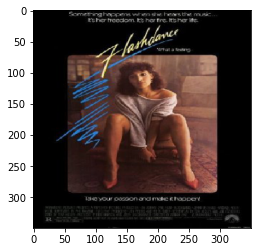

In [11]:
plt.imshow(X[1])

# Data Preparation

In [12]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [13]:
#Now we will prepare the dataset. We have already got the feature space in X.
#Now we will get the target in y. For that, we will drop the Id and Genre columns from data.

y = data.drop(['Id', 'Genre'], axis = 1)
y = y.to_numpy()
y.shape

(7254, 25)

In [14]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15)

In [15]:
X_train[0].shape

(350, 350, 3)

In [ ]:
# this is input for our CNN model

# Building CNN

In [16]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(25, activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [ ]:
#Now we will compile and fit the model. We will use 5 epochs to train the model. An epoch is an iteration over the entire data provided. validation_data is the data on which to evaluate the loss and any model metrics at the end of each epoch. 
#As metrics = ['accuracy'] the model will be evaluated based on the accuracy.

In [18]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
193/193 [==============================] - 762s 4s/step - loss: 0.8292 - accuracy: 0.0813 - val_loss: 0.9800 - val_accuracy: 0.0018
Epoch 2/5
193/193 [==============================] - 717s 4s/step - loss: 0.3445 - accuracy: 0.2360 - val_loss: 0.2846 - val_accuracy: 0.2020
Epoch 3/5
193/193 [==============================] - 25397s 132s/step - loss: 0.2647 - accuracy: 0.2763 - val_loss: 0.2533 - val_accuracy: 0.1919
Epoch 4/5
193/193 [==============================] - 768s 4s/step - loss: 0.2532 - accuracy: 0.2974 - val_loss: 0.2433 - val_accuracy: 0.2176
Epoch 5/5
193/193 [==============================] - 766s 4s/step - loss: 0.2463 - accuracy: 0.3150 - val_loss: 0.2480 - val_accuracy: 0.2489


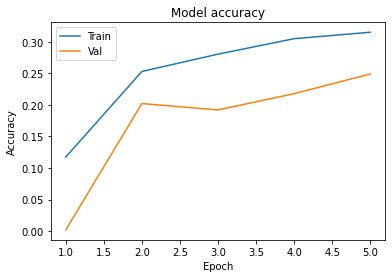

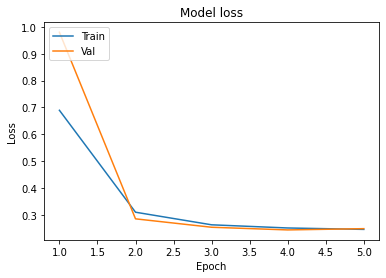

In [19]:
#Lets Visualize the results
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

plot_learningCurve(history, 5)

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')
Comedy
Drama
Romance


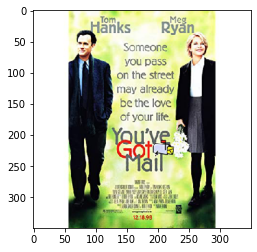

In [21]:
#We can see that the validation accuracy is more than the training accuracy 
#and the validation loss is less than the training loss. Hence the model is not overfitting.
#Now Prediting the movie poster
img = image.load_img('tom_hanks.jpg', target_size=(img_width, img_height, 3))
plt.imshow(img)
img = image.img_to_array(img)
img = img/255.0

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[2:]
print(classes)
y_prob = model.predict(img)
top3 = np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])